In [352]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc #garbage collector

# EDA


In [353]:
def load_data(url_file):
  df = pd.read_csv(url_file)
  return df

In [354]:
df_movies = load_data('out.csv')
print(df1.shape)

(22765, 14)


In [355]:
df_movies.dtypes

type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
listed_in        object
description      object
id               object
platform         object
duration_int      int64
duration_type    object
dtype: object

In [356]:
url = 'out_ratings.csv'
df_ratings = load_data(url)

In [357]:
df_ratings.shape

(11024289, 4)

In [358]:
df_ratings.dtypes


userId         int64
rating       float64
timestamp      int64
movieId       object
dtype: object

In [359]:
# rating por userId
rating_count_user =df_ratings.groupby(['userId']).count()
#rating_mean_user = df_ratings.groupby(['userId']).mean()

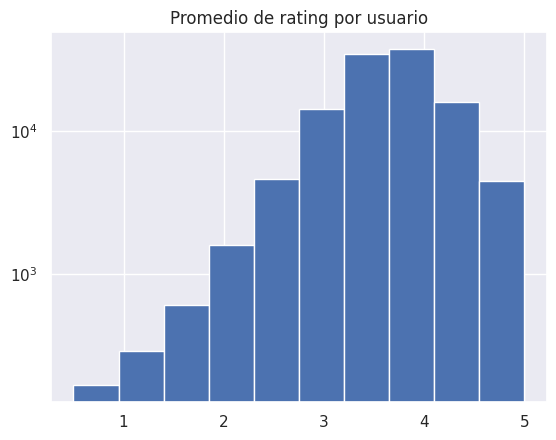

In [360]:
plt.hist(rating_mean_user["rating"], log= True)
plt.title('Promedio de rating por usuario')
plt.show()

<Axes: >

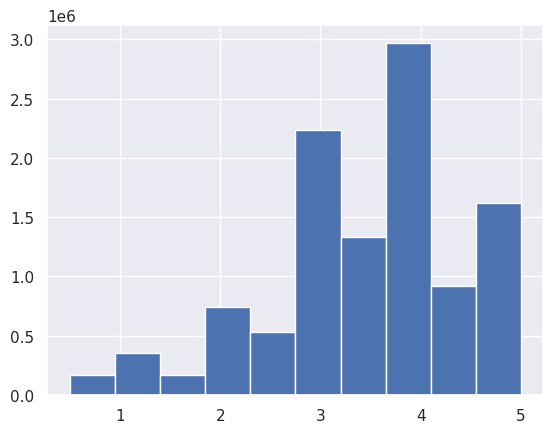

In [361]:
df_ratings['rating'].hist()

# Peliculas mas vistas


In [362]:
df1_by_movies = df_ratings.groupby(['movieId']).count()

In [363]:
df1_by_movies.sort_values('userId', ascending = False, inplace = True)

In [364]:
df1_by_movies['views'] = df1_by_movies['userId']
df1_by_movies['movieId'] = df1_by_movies.index

In [365]:
df1_by_movies.drop(columns=['userId','rating','timestamp'], inplace = True)

In [366]:
df1_by_movies.reset_index(drop=True, inplace=True)

## Recuperamos el titulo por movieId

In [367]:
df1_by_movies.head(3)

,rating,views,movieId
0,576,576,as4197
1,560,560,as9065
2,558,558,ns7279


In [368]:
#row_to_update = df1_by_movies[df1_by_movies["movieId"]=="as4197"]

In [369]:
df1_by_movies.head(3)

,rating,views,movieId
0,576,576,as4197
1,560,560,as9065
2,558,558,ns7279


In [370]:
d = df_movies.groupby(['id','title'])[["title", "id"]]
d.head(3)

,title,id
0,the grand seduction,as1
1,take care good night,as2
2,secrets of deception,as3
3,pink: staying true,as4
4,monster maker,as5
...,...,...
22760,zodiac,ns8803
22761,zombie dumb,ns8804
22762,zombieland,ns8805
22763,zoom,ns8806


# ML

In [371]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import Reader

In [372]:
reader = Reader()
N_filas = 10000

In [373]:
#data = Dataset.load_from_df(df_movies[['type', 'title', 'director','rating']][:N_filas], reader)
data = Dataset.load_from_df(df1_by_movies[["views","movieId","title"]], reader)

KeyError: "['title'] not in index"

In [ ]:
data